In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def twoD_gaussian(size: int = 128, normalized_sigma: float = 1):
    x, y = torch.arange(-size//2, size//2), torch.arange(-size//2, size//2)
    x, y = torch.meshgrid([x,y])
    sigma = normalized_sigma*size/2
    filter = 1/(2*torch.pi*sigma**2) * torch.exp(- ((x**2)+(y**2))/(2*sigma**2))
    return filter / filter.max()

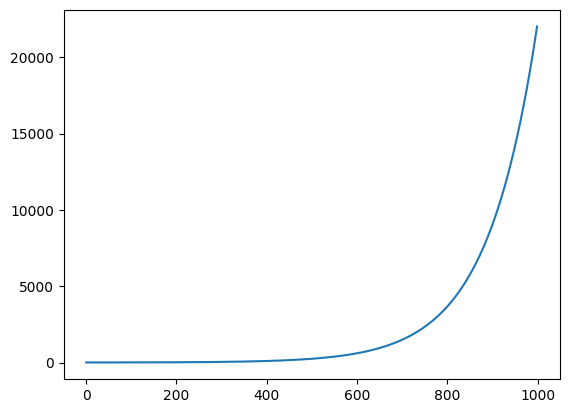

In [9]:
fig, ax = plt.subplots()
x = np.linspace(1,10,1000)
y = np.exp(x)
ax.plot(y)

Text(0.5, 0, 'time')

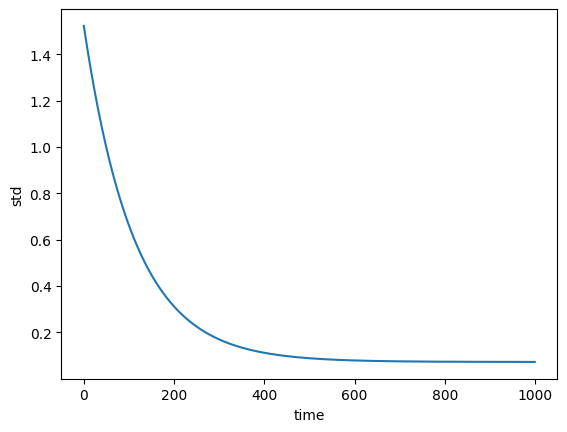

In [11]:
start = 0.05
end = 1.5
schedule = (y / y.max() + start) * (end-start)

fig, ax = plt.subplots()
ax.plot(torch.arange(1000), schedule[::-1])
ax.set_ylabel("std")
ax.set_xlabel("time")

Text(0.5, 1.0, 'Schedule of Gaussian standard deviations')

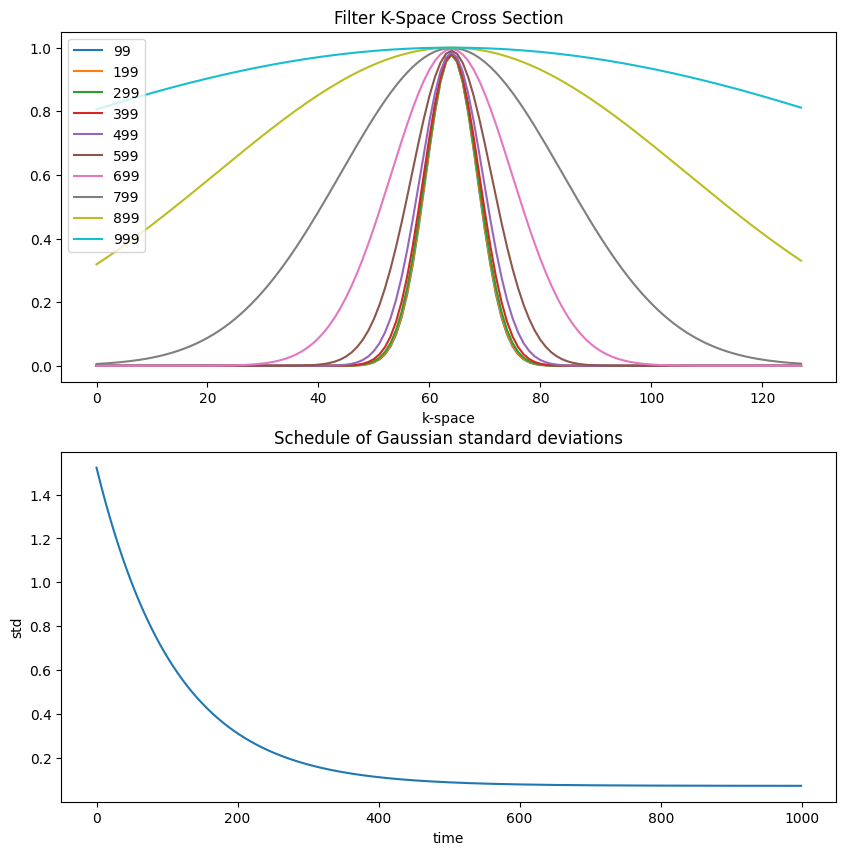

In [23]:
fig, ax = plt.subplots(2, figsize=(10,10))
filters = [twoD_gaussian(normalized_sigma=i)[63] for i in schedule]
for i,elem in enumerate(filters):
    if i%100 == 99:
        ax[0].plot(elem, label=i)
ax[0].set_xlabel("k-space")
ax[0].legend()
ax[0].set_title("Filter K-Space Cross Section")

ax[1].plot(torch.arange(1000), schedule[::-1])
ax[1].set_ylabel("std")
ax[1].set_xlabel("time")
ax[1].set_title("Schedule of Gaussian standard deviations")

In [21]:
def _1d_gaussian(size: int = 128, normalized_sigma: float = 1):
    x, y = torch.arange(-size//2, size//2), torch.arange(-size//2, size//2)
    x, y = torch.meshgrid([x,y])
    sigma = normalized_sigma*size/2
    filter = 1/(2*torch.pi*sigma**2) * torch.exp(- ((y**2))/(2*sigma**2))
    return filter / filter.max()

Text(0.5, 1.0, 'Schedule of Gaussian standard deviations')

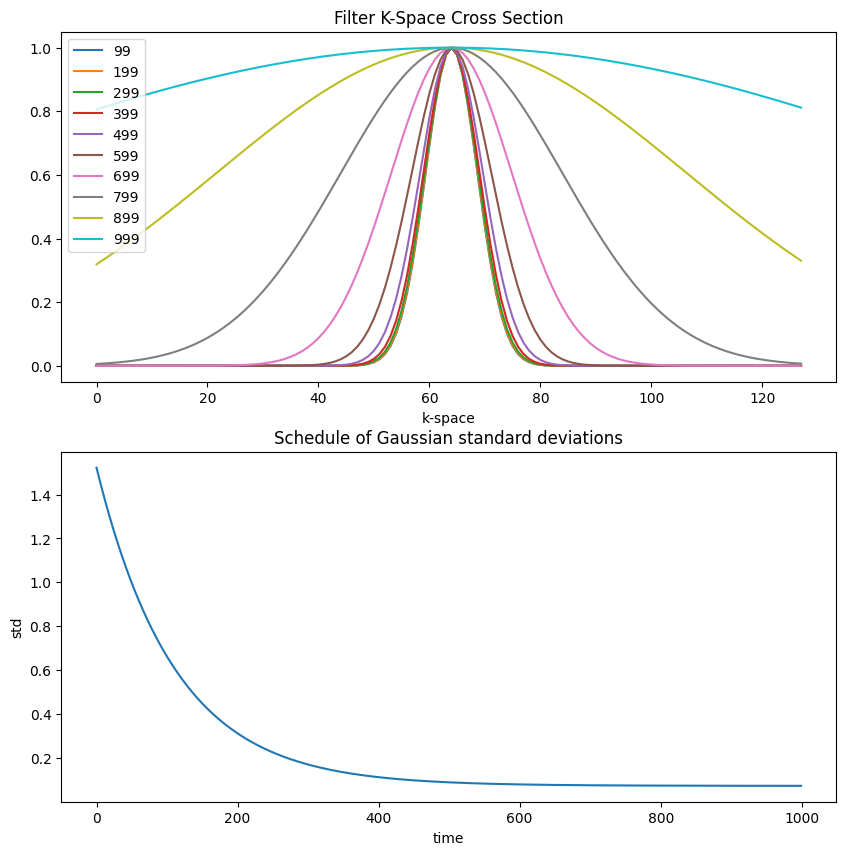

In [24]:
fig, ax = plt.subplots(2, figsize=(10,10))
filters = [_1d_gaussian(normalized_sigma=i)[63] for i in schedule]
for i,elem in enumerate(filters):
    if i%100 == 99:
        ax[0].plot(elem, label=i)
ax[0].set_xlabel("k-space")
ax[0].legend()
ax[0].set_title("Filter K-Space Cross Section")

ax[1].plot(torch.arange(1000), schedule[::-1])
ax[1].set_ylabel("std")
ax[1].set_xlabel("time")
ax[1].set_title("Schedule of Gaussian standard deviations")